# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [8]:
# Import the first file - True.csv

# Import the second file - Fake.csv

df_True=pd.read_csv("/content/True.csv")
df_Fake=pd.read_csv("/content/Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [9]:
# Inspect the DataFrame with True News to understand the given data
df_True.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [10]:
# Inspect the DataFrame with Fake News to understand the given data
df_Fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [11]:
# Print the column details for True News DataFrame
df_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [12]:
# Print the column details for Fake News Dataframe
df_Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [13]:
# Print the column names of both DataFrames
print("True News Columns:", df_True.columns.tolist())
print("Fake News Columns:", df_Fake.columns.to_list())




True News Columns: ['title', 'text', 'date']
Fake News Columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [14]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

df_True['news_label'] = 1  # True news → label 1
df_Fake['news_label'] = 0 # Frue news → label 1

print(df_True[['title', 'news_label']].head())
print(df_Fake[['title', 'news_label']].head())


                                               title  news_label
0  As U.S. budget fight looms, Republicans flip t...           1
1  U.S. military to accept transgender recruits o...           1
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1
3  FBI Russia probe helped by Australian diplomat...           1
4  Trump wants Postal Service to charge 'much mor...           1
                                               title  news_label
0   Donald Trump Sends Out Embarrassing New Year’...           0
1   Drunk Bragging Trump Staffer Started Russian ...           0
2   Sheriff David Clarke Becomes An Internet Joke...           0
3   Trump Is So Obsessed He Even Has Obama’s Name...           0
4   Pope Francis Just Called Out Donald Trump Dur...           0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [15]:
# Combine the true and fake news DataFrames into a single DataFrame
merged_df = pd.concat([df_True, df_Fake], ignore_index=True)

In [16]:
# Display the first 5 rows of the combined DataFrame to verify the result
merged_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

In [17]:
merged_df.shape

(44940, 4)

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [18]:
# Check Presence of Null Values
merged_df.isnull().sum()



title         21
text          21
date          42
news_label     0
dtype: int64

In [19]:
# Handle Rows with Null Values
merged_df.dropna()


title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44935  McPain: John McCain Furious That Iran Treated ...   
44936  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44937  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44938  How to Blow $700 Million: Al Jazeera America F...   
44939  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text                date  \
0      WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1      WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2      WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3      WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    
...                                                  ...                 ...   
44935  21st Century Wire says As 21WIRE reported earl...    January 16, 2016   
44936  21st Century Wire says It s a familiar theme. ...    January 16, 2016   
44937  Patrick Henningsen  21st Century WireRemember ...    January 15, 2016   
44938  21st Century Wire says Al Jazeera America will...    January 14, 2016   
44939  21st Century Wire says As 21WIRE predicted in ...    January 12, 2016   

       news_label  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
44935           0  
44936           0  
44937           0  
44938           0  
44939           0  

[44898 rows x 4 columns]

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [20]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

# Drop the irrelevant columns from the DataFrame as they are no longer needed

# Display the first 5 rows of the updated DataFrame to check the result


merged_df['news_text'] = merged_df['title'].fillna('') + ' ' + \
                         merged_df['text'].fillna('')

merged_df.drop(columns=['title', 'text', 'date'], inplace=True)

merged_df.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [21]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification

df_clean = pd.DataFrame()


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [22]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers


def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # 5. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [23]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = merged_df['news_text'].apply(clean_text)

# Add label
df_clean['news_label'] = merged_df['news_label']


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [24]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def clean_lemmatize_news_text(text):
    doc = nlp(text)
    lemmatized_news_text = [token.lemma_ for token in doc
                  if not token.is_stop and not token.is_punct and token.pos_ != 'PRON']
    return ' '.join(lemmatized_news_text)





#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [25]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['cleaned_news_text'] = df_clean['cleaned_text'].apply(clean_lemmatize_news_text)

# Display first 5 rows
print(df_clean.head())

                                        cleaned_text  news_label  \
0  as us budget fight looms republicans flip thei...           1   
1  us military to accept transgender recruits on ...           1   
2  senior us republican senator let mr mueller do...           1   
3  fbi russia probe helped by australian diplomat...           1   
4  trump wants postal service to charge much more...           1   

                                   cleaned_news_text  
0  budget fight loom republicans flip fiscal scri...  
1  military accept transgender recruit monday pen...  
2  senior republican senator let mr mueller job w...  
3  fbi russia probe help australian diplomat tipo...  
4  trump want postal service charge amazon shipme...  


### Save the Cleaned data as a csv file (Recommended)

In [26]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [27]:
# Check the first few rows of the DataFrame
df_clean.head()

cleaned_text  news_label  \
0  as us budget fight looms republicans flip thei...           1   
1  us military to accept transgender recruits on ...           1   
2  senior us republican senator let mr mueller do...           1   
3  fbi russia probe helped by australian diplomat...           1   
4  trump wants postal service to charge much more...           1   

                                   cleaned_news_text  
0  budget fight loom republicans flip fiscal scri...  
1  military accept transgender recruit monday pen...  
2  senior republican senator let mr mueller job w...  
3  fbi russia probe help australian diplomat tipo...  
4  trump want postal service charge amazon shipme...

In [28]:
# Check the dimensions of the DataFrame
df_clean.shape


(44940, 3)

In [29]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cleaned_text       44910 non-null  object
 1   news_label         44940 non-null  int64 
 2   cleaned_news_text  44910 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [33]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = df_clean['cleaned_news_text']
y = df_clean['news_label']

# Split into 70% train and 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the sizes of the splits
print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))


Training samples: 31458
Validation samples: 13482


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [36]:
# Add a new column to calculate the character length of cleaned news text


# Add a new column to calculate the character length of lemmatized news text with POS tags removed

df_clean['cleaned_text_len'] = df_clean['cleaned_text'].fillna('').astype(str).apply(len)

# Add character length of lemmatized nouns
df_clean['cleaned_news_text_len'] = df_clean['cleaned_news_text'].fillna('').astype(str).apply(len)

# Display first few rows
print(df_clean[['cleaned_text', 'cleaned_text_len', 'cleaned_news_text', 'cleaned_news_text_len']].head())

                                        cleaned_text  cleaned_text_len  \
0  as us budget fight looms republicans flip thei...              4547   
1  us military to accept transgender recruits on ...              4033   
2  senior us republican senator let mr mueller do...              2777   
3  fbi russia probe helped by australian diplomat...              2453   
4  trump wants postal service to charge much more...              5037   

                                   cleaned_news_text  cleaned_news_text_len  
0  budget fight loom republicans flip fiscal scri...                   3069  
1  military accept transgender recruit monday pen...                   2786  
2  senior republican senator let mr mueller job w...                   1783  
3  fbi russia probe help australian diplomat tipo...                   1657  
4  trump want postal service charge amazon shipme...                   3312  


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

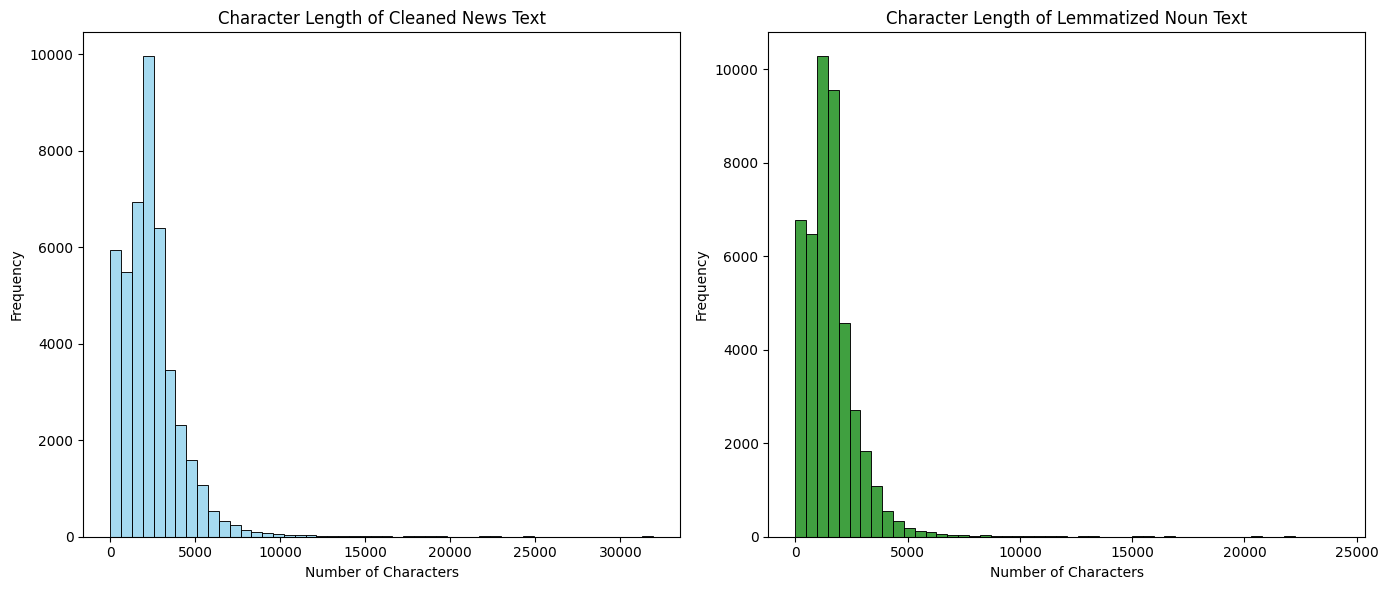

In [37]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
plt.figure(figsize=(14, 6))

# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
sns.histplot(df_clean['cleaned_text_len'], bins=50, color='skyblue')
plt.title('Character Length of Cleaned News Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
sns.histplot(df_clean['cleaned_news_text_len'], bins=50, color='green')
plt.title('Character Length of Lemmatized Noun Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()




### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [38]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter true news from the training set
true_news_text = X_train[y_train == 1]

# Step 2: Combine all text into a single string, handle non-strings
true_news_string = ' '.join(true_news_text.dropna().astype(str))

# Step 3: Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='viridis'
).generate(true_news_string)

# Step 4: Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Set)', fontsize=16)
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [39]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter true news from the training set
fake_news_text = X_train[y_train == 0]

# Step 2: Combine all text into a single string, handle non-strings
fake_news_string = ' '.join(fake_news_text.dropna().astype(str))

# Step 3: Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='viridis'
).generate(fake_news_string)

# Step 4: Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Set)', fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [40]:
# Write a function to get the specified top n-grams

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):

    # Initialize CountVectorizer for specified n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus.dropna().astype(str))

    # Sum counts of each n-gram across all documents
    counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()

    # Combine and sort
    ngram_counts = list(zip(ngrams, counts))
    sorted_ngrams = sorted(ngram_counts, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(sorted_ngrams, columns=['ngram', 'count'])


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [41]:
# Handle NaN values in the text data
df_clean['cleaned_text'] = df_clean['cleaned_text'].fillna('')
df_clean['cleaned_news_text'] = df_clean['cleaned_news_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [50]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_top_unigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(1, 1), top_n=10)

# Print the result
print(true_top_unigrams)

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_unigrams,
    x='count',
    y='ngram',
    palette='Blues_d'
)
plt.title('Top 10 Unigrams in True News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()


        ngram  count
0         say  77749
1       trump  41330
2   president  19285
3       state  17493
4  government  13934
5        year  13298
6       house  12955
7         new  12428
8  republican  12318
9      reuter  11513


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



               ngram  count
0      united states   8490
1       donald trump   7196
2        white house   6499
3        north korea   4304
4   president donald   4192
5           new york   3225
6     prime minister   2971
7  washington reuter   2952
8          trump say   2798
9      say statement   2737


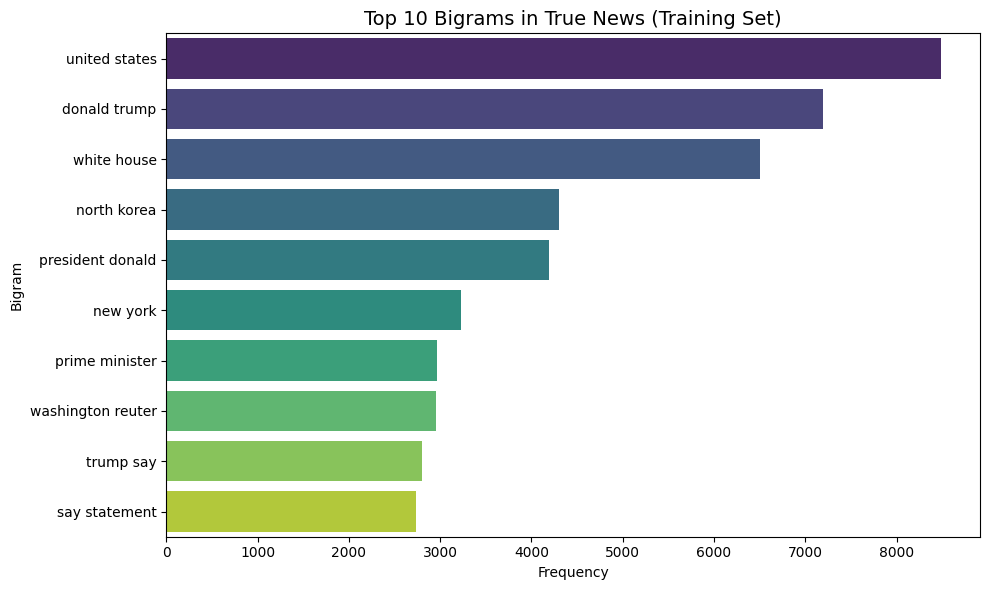

In [51]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

true_top_bigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(2, 2), top_n=10)

# Display the result
print(true_top_bigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_bigrams,
    x='count',
    y='ngram',
    palette='viridis'
)
plt.title('Top 10 Bigrams in True News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()



##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  count
0        president donald trump   4149
1        president barack obama   2013
2               white house say    775
3       reuter president donald    589
4   presidentelect donald trump    584
5       respond request comment    571
6      president vladimir putin    552
7      reuters president donald    487
8  washington reuters president    476
9           secretary state rex    469


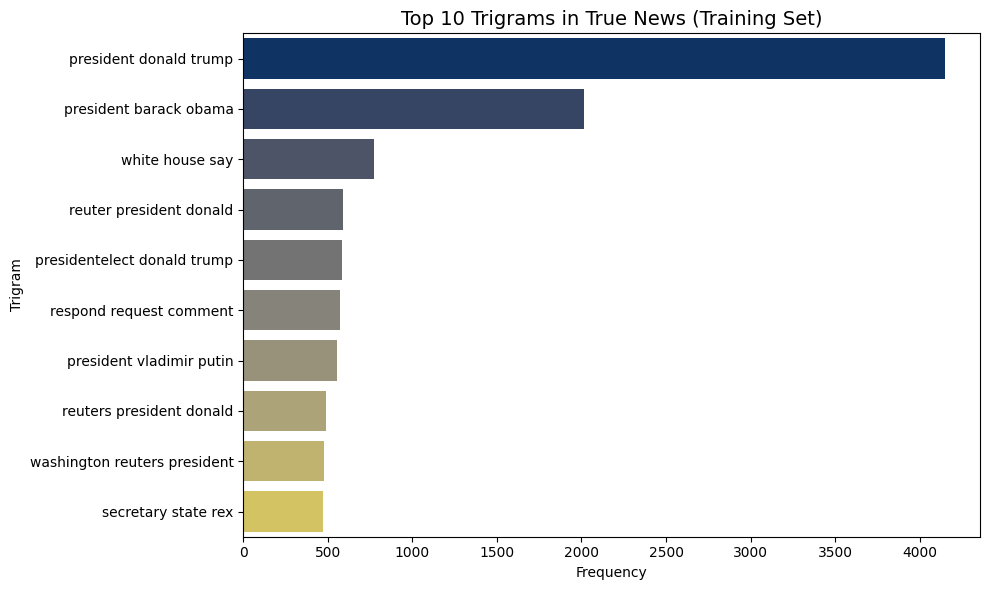

In [52]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

true_top_trigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(3, 3), top_n=10)

# Display the result
print(true_top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_trigrams,
    x='count',
    y='ngram',
    palette='cividis'
)
plt.title('Top 10 Trigrams in True News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

       ngram  count
0      trump  57009
1        say  30656
2  president  19417
3     people  18652
4      obama  14784
5    clinton  13799
6       like  13249
7     donald  12634
8      state  12386
9       know  11918


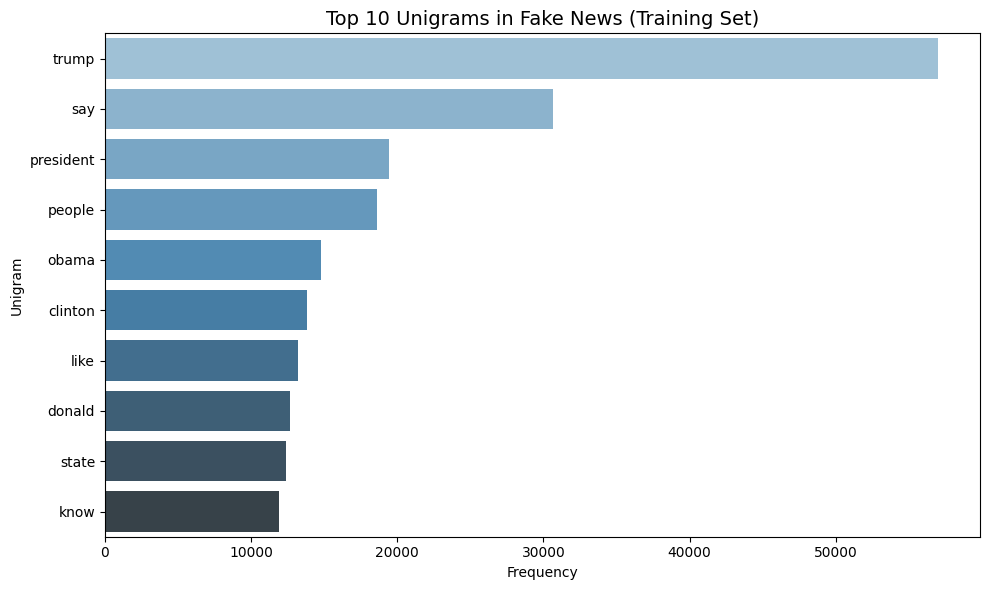

In [53]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_top_unigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(1, 1), top_n=10)

# Print the result
print(fake_top_unigrams)

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_unigrams,
    x='count',
    y='ngram',
    palette='Blues_d'
)
plt.title('Top 10 Unigrams in Fake News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



             ngram  count
0     donald trump  11217
1  hillary clinton   4938
2      white house   4740
3    united states   4329
4         new york   3040
5  president trump   2912
6  president obama   2887
7         fox news   2439
8     barack obama   1693
9  trump supporter   1579


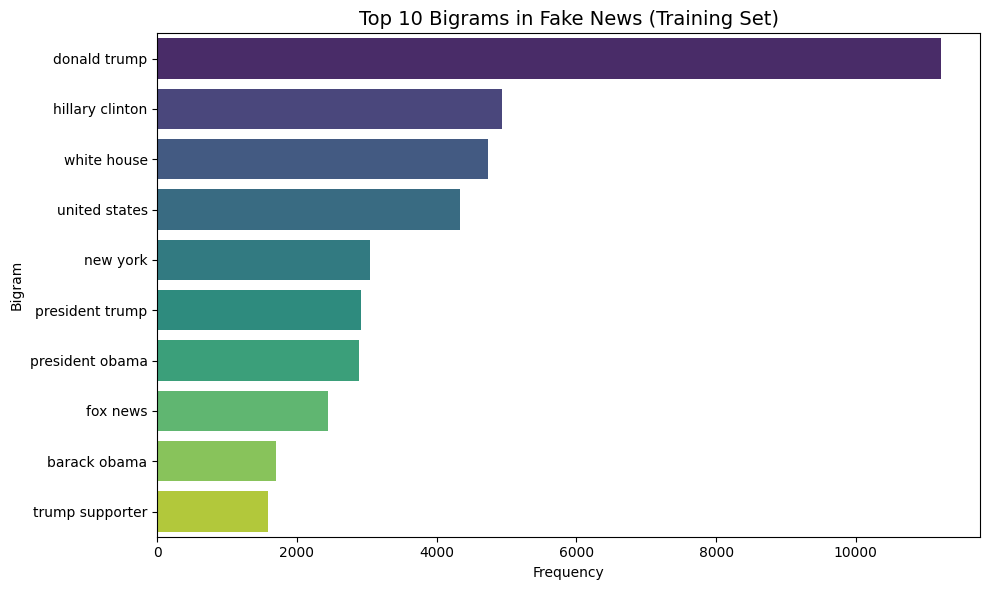

In [54]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_top_bigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(2, 2), top_n=10)

# Print the result
print(fake_top_bigrams)

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_bigrams,
    x='count',
    y='ngram',
    palette='viridis'
)
plt.title('Top 10 Bigrams in Fake News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                          ngram  count
0  donald trump realdonaldtrump   1178
1                new york times   1039
2             black life matter    985
3        president donald trump    692
4       president united states    653
5             news century wire    645
6        president barack obama    638
7          video screen capture    520
8            image video screen    504
9              century wire say    497


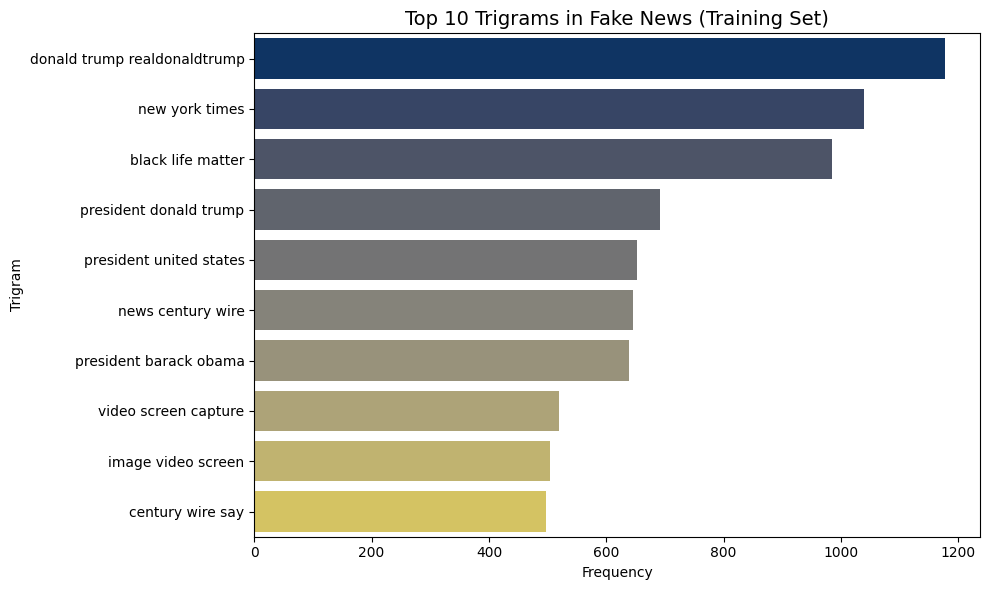

In [55]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_top_trigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(3, 3), top_n=10)

# Print the result
print(fake_top_trigrams)

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_trigrams,
    x='count',
    y='ngram',
    palette='cividis'
)
plt.title('Top 10 Trigrams in Fake News (Training Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [59]:
# Add a new column to calculate the character length of cleaned news text


# Add a new column to calculate the character length of lemmatized news text with POS tags removed

print("Validation Set Size:", X_val.shape[0])

df_clean['cleaned_text_len'] = df_clean['cleaned_text'].fillna('').astype(str).apply(len)

# Add character length of lemmatized nouns
df_clean['cleaned_news_text_len'] = df_clean['cleaned_news_text'].fillna('').astype(str).apply(len)

# Display first few rows
print(df_clean[['cleaned_text', 'cleaned_text_len', 'cleaned_news_text', 'cleaned_news_text_len']].head())


Validation Set Size: 13482
                                        cleaned_text  cleaned_text_len  \
0  as us budget fight looms republicans flip thei...              4547   
1  us military to accept transgender recruits on ...              4033   
2  senior us republican senator let mr mueller do...              2777   
3  fbi russia probe helped by australian diplomat...              2453   
4  trump wants postal service to charge much more...              5037   

                                   cleaned_news_text  cleaned_news_text_len  
0  budget fight loom republicans flip fiscal scri...                   3069  
1  military accept transgender recruit monday pen...                   2786  
2  senior republican senator let mr mueller job w...                   1783  
3  fbi russia probe help australian diplomat tipo...                   1657  
4  trump want postal service charge amazon shipme...                   3312  


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

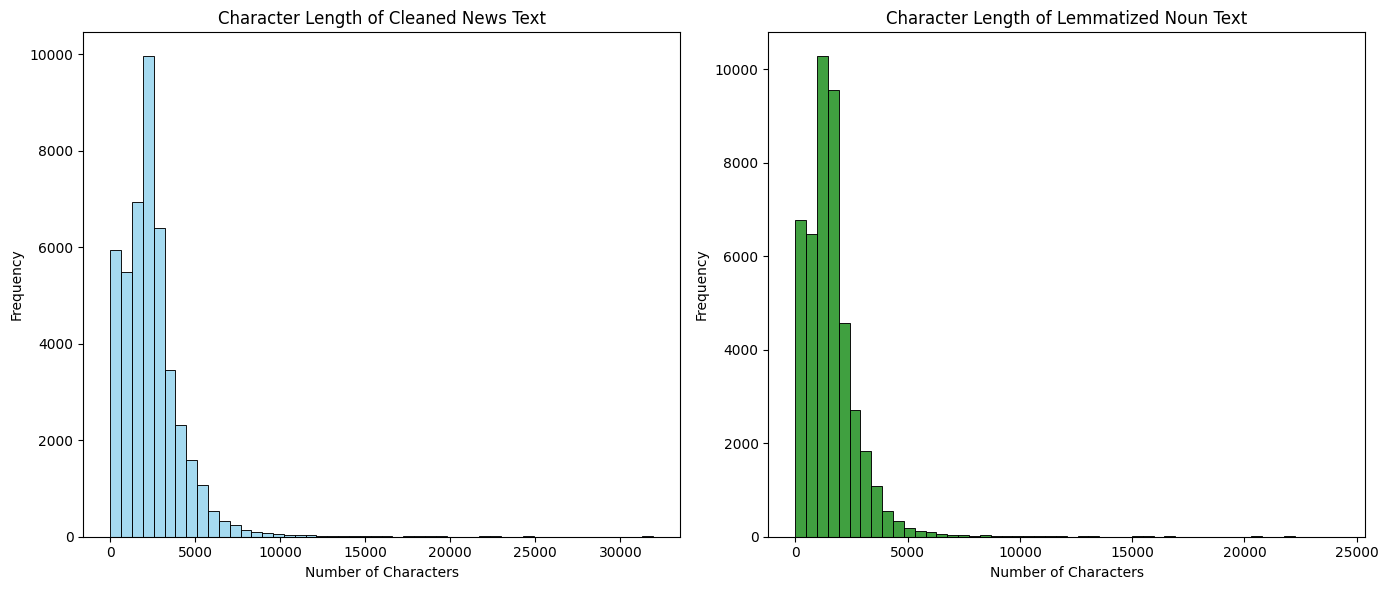

In [60]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
# Set up plot style
plt.figure(figsize=(14, 6))

# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
sns.histplot(df_clean['cleaned_text_len'], bins=50, color='skyblue')
plt.title('Character Length of Cleaned News Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
sns.histplot(df_clean['cleaned_news_text_len'], bins=50, color='green')
plt.title('Character Length of Lemmatized Noun Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

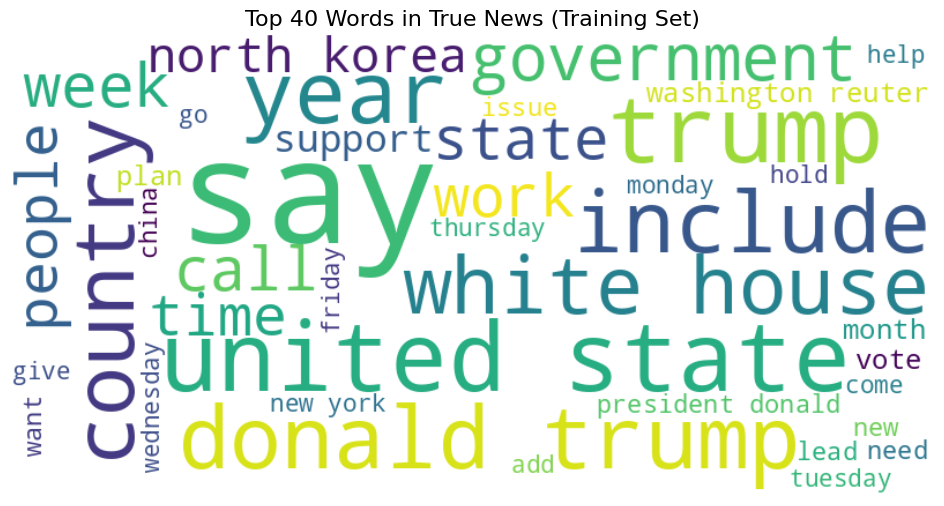

In [61]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter true news from the training set
true_news_text = X_val[y_val == 1]

# Step 2: Combine all text into a single string, handle non-strings
true_news_string = ' '.join(true_news_text.dropna().astype(str))

# Step 3: Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='viridis'
).generate(true_news_string)

# Step 4: Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Validation Set)', fontsize=16)
plt.show()


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

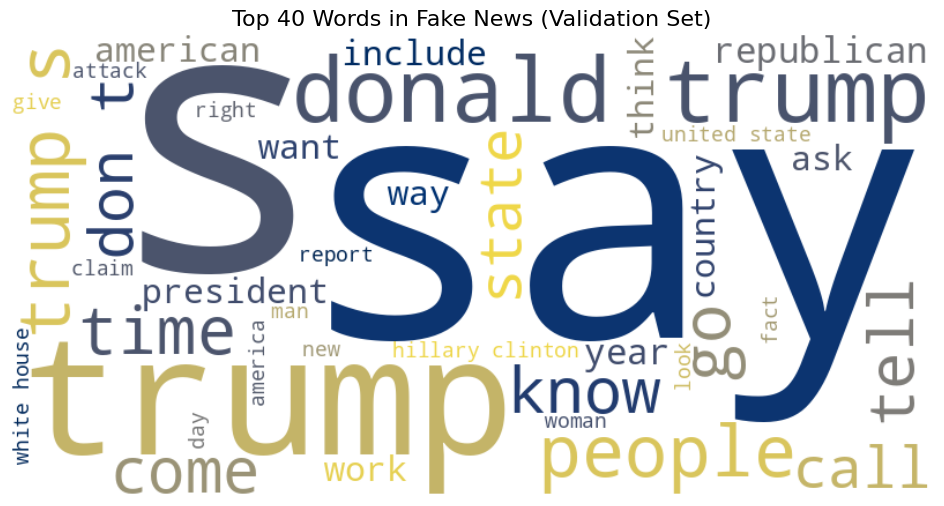

In [97]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter true news from the training set
fake_news_text = X_val[y_val == 0]

# Step 2: Combine all text into a single string, handle non-strings
fake_news_string = ' '.join(fake_news_text.dropna().astype(str))

# Step 3: Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='cividis'
).generate(fake_news_string)

# Step 4: Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Validation Set)', fontsize=16)
plt.show()



### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

##### 5.3.2 Handle the NaN values

In [63]:
## First handle NaN values in the text data
df_clean['cleaned_text'] = df_clean['cleaned_text'].fillna('')
df_clean['cleaned_news_text'] = df_clean['cleaned_news_text'].fillna('')

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

        ngram  count
0         say  33491
1       trump  16949
2   president   8212
3       state   7466
4  government   5946
5        year   5669
6       house   5468
7         new   5282
8  republican   5151
9      reuter   4907


Text(0, 0.5, 'Unigram')

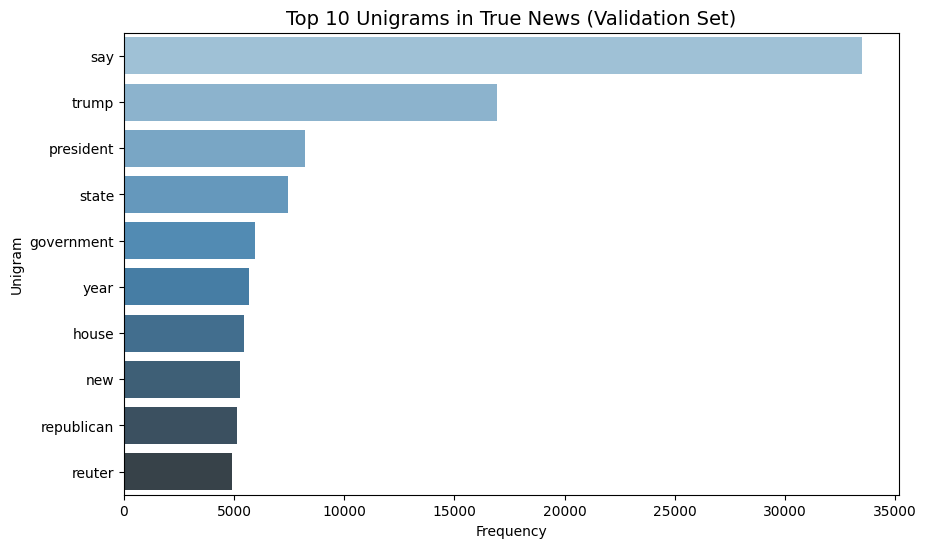

In [64]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_top_unigrams = get_top_ngrams(X_val[y_val == 1], ngram_range=(1, 1), top_n=10)

# Print the result
print(true_top_unigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_unigrams,
    x='count',
    y='ngram',
    palette='Blues_d'
)
plt.title('Top 10 Unigrams in True News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

               ngram  count
0      united states   3721
1       donald trump   3020
2        white house   2683
3        north korea   1984
4   president donald   1739
5           new york   1346
6          trump say   1276
7      say statement   1262
8     prime minister   1250
9  washington reuter   1224


Text(0, 0.5, 'Bigram')

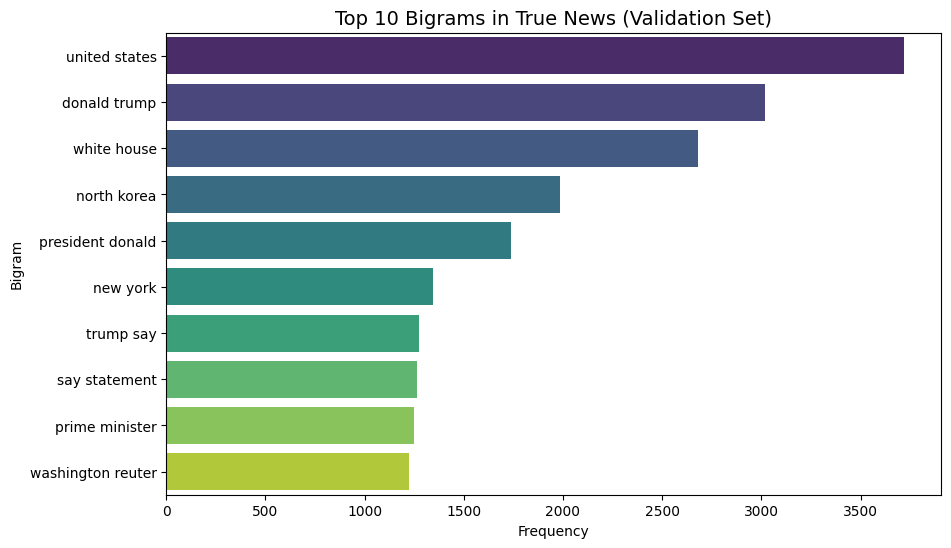

In [65]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_top_bigrams = get_top_ngrams(X_val[y_val == 1], ngram_range=(2, 2), top_n=10)

# Print the result
print(true_top_bigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_bigrams,
    x='count',
    y='ngram',
    palette='viridis'
)
plt.title('Top 10 Bigrams in True News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

                          ngram  count
0        president donald trump   1720
1        president barack obama    884
2               white house say    323
3       reuter president donald    272
4       respond request comment    261
5   presidentelect donald trump    248
6      president vladimir putin    238
7  washington reuters president    218
8      reuters president donald    215
9     national security adviser    206


Text(0, 0.5, 'Trigram')

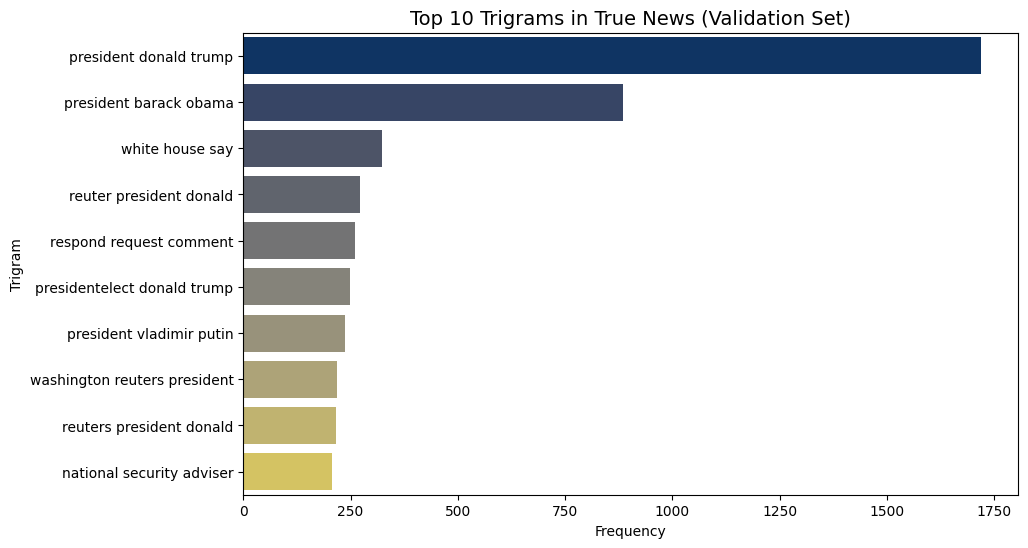

In [68]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_top_trigrams = get_top_ngrams(X_val[y_val == 1], ngram_range=(3, 3), top_n=10)

# Print the result
print(true_top_trigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=true_top_trigrams,
    x='count',
    y='ngram',
    palette='cividis'
)
plt.title('Top 10 Trigrams in True News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

       ngram  count
0      trump  23620
1        say  13154
2     people   7828
3  president   7743
4    clinton   5891
5      obama   5607
6       like   5472
7      state   5448
8     donald   5299
9    hillary   4821


Text(0, 0.5, 'Unigram')

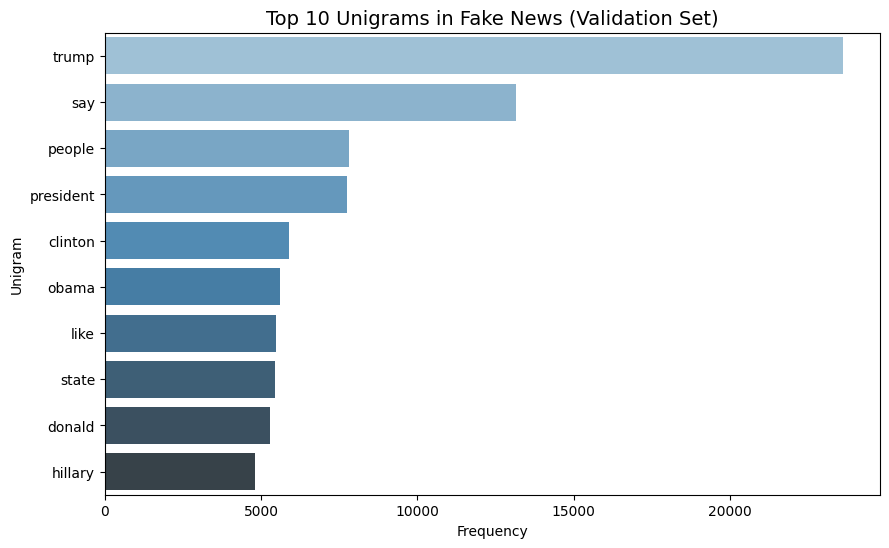

In [98]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

fake_top_unigrams = get_top_ngrams(X_val[y_val == 0], ngram_range=(1, 1), top_n=10)

# Print the result
print(fake_top_unigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_unigrams,
    x='count',
    y='ngram',
    palette='Blues_d'
)
plt.title('Top 10 Unigrams in Fake News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

             ngram  count
0     donald trump   4761
1  hillary clinton   2185
2      white house   1882
3    united states   1821
4         new york   1217
5  president trump   1207
6  president obama   1080
7         fox news   1048
8  trump supporter    648
9     century wire    606


Text(0, 0.5, 'Bigram')

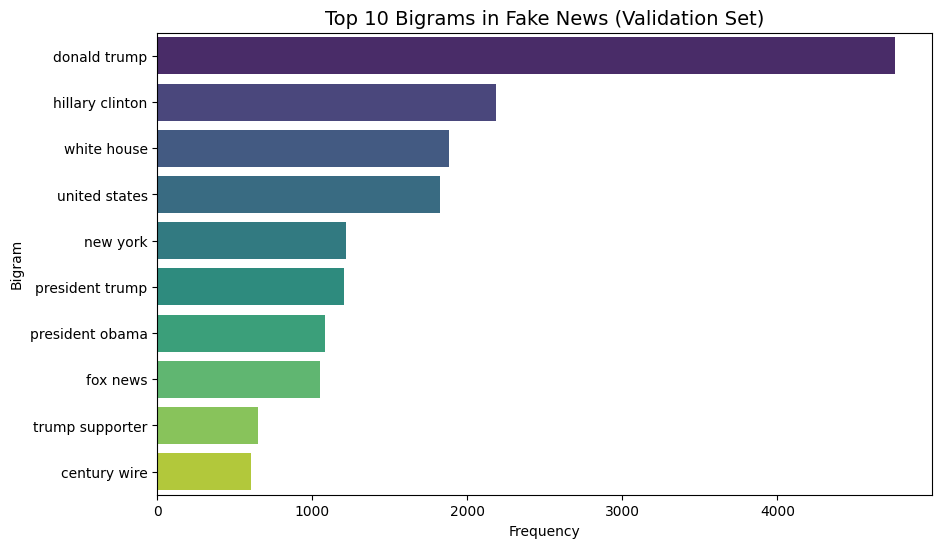

In [99]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_top_bigrams = get_top_ngrams(X_val[y_val == 0], ngram_range=(2, 2), top_n=10)

# Print the result
print(fake_top_bigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_bigrams,
    x='count',
    y='ngram',
    palette='viridis'
)
plt.title('Top 10 Bigrams in Fake News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

                          ngram  count
0  donald trump realdonaldtrump    514
1                new york times    426
2             black life matter    384
3             news century wire    296
4        president donald trump    276
5       president united states    260
6              century wire say    230
7        president barack obama    225
8          video screen capture    208
9            image video screen    194


Text(0, 0.5, 'Trigram')

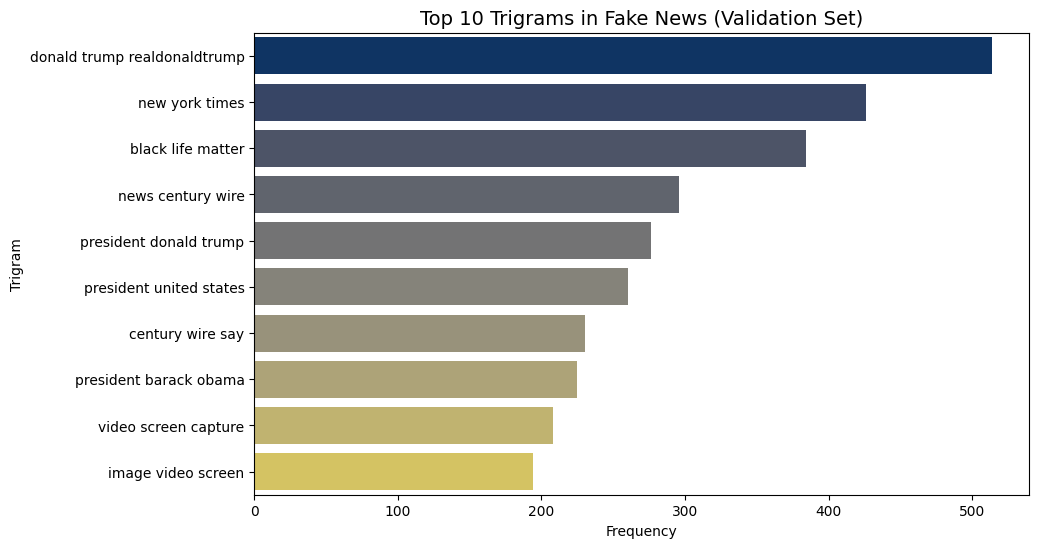

In [100]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_top_trigrams = get_top_ngrams(X_val[y_val == 0], ngram_range=(3, 3), top_n=10)

# Print the result
print(fake_top_trigrams)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=fake_top_trigrams,
    x='count',
    y='ngram',
    palette='cividis'
)
plt.title('Top 10 Trigrams in Fake News (Validation Set)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Trigram')

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [79]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.0 MB/s eta 0:00:00


In [80]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the pre-trained word2vec-google-news-300 model
print("Downloading 'word2vec-google-news-300' model...")
word2vec_model = api.load("word2vec-google-news-300")

print("Model loaded successfully!")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [82]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

import numpy as np

def get_avg_word2vec(text_series, model, vector_size=300):

    vectors = []

    for text in text_series:
        if not isinstance(text, str):
            vectors.append(np.zeros(vector_size))
            continue

        words = text.split()
        word_vecs = [model[word] for word in words if word in model]

        if word_vecs:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(vector_size))  # If no valid words, use zero vector

    return np.array(vectors)



In [83]:
## Extract the target variable for the training data and validation data

print("Extracting Word2Vec vectors for training data...")
X_train_vec = get_avg_word2vec(X_train, word2vec_model)

print("Extracting Word2Vec vectors for validation data...")
X_val_vec = get_avg_word2vec(X_val, word2vec_model)


Extracting Word2Vec vectors for training data...
Extracting Word2Vec vectors for validation data...


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [86]:
## Initialise Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialise the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model on training data
log_reg.fit(X_train_vec, y_train)

# 3. Predict on validation data
y_pred = log_reg.predict(X_val_vec)




##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [87]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


Validation Accuracy: 0.9537160658655985



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7057
           1       0.94      0.96      0.95      6425

    accuracy                           0.95     13482
   macro avg       0.95      0.95      0.95     13482
weighted avg       0.95      0.95      0.95     13482



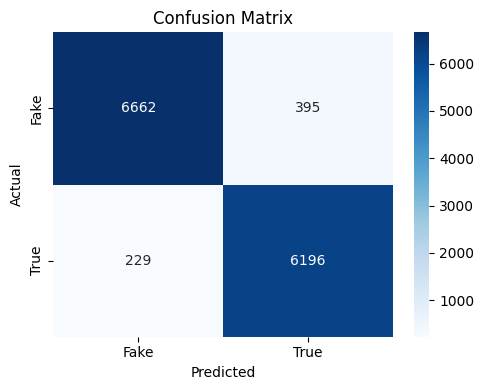

In [88]:
# Classification Report

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [90]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialise the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model
dt_model.fit(X_train_vec, y_train)

# 3. Predict on validation data
y_pred_dt = dt_model.predict(X_val_vec)






##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [91]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Validation Accuracy:", accuracy_score(y_val, y_pred_dt))



Validation Accuracy: 0.8795430944963655



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7057
           1       0.88      0.86      0.87      6425

    accuracy                           0.88     13482
   macro avg       0.88      0.88      0.88     13482
weighted avg       0.88      0.88      0.88     13482



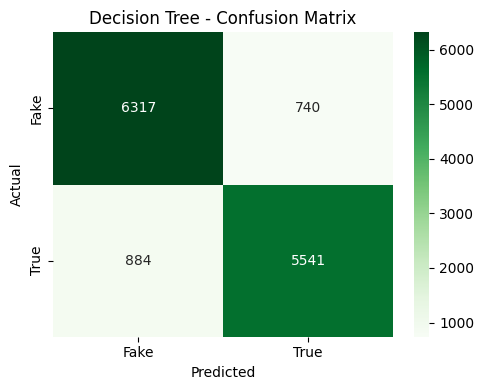

In [92]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_val, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [93]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialise the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train_vec, y_train)

# 3. Predict on validation data
y_pred_rf = rf_model.predict(X_val_vec)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [94]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))


Validation Accuracy: 0.9427384661029521



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7057
           1       0.94      0.94      0.94      6425

    accuracy                           0.94     13482
   macro avg       0.94      0.94      0.94     13482
weighted avg       0.94      0.94      0.94     13482



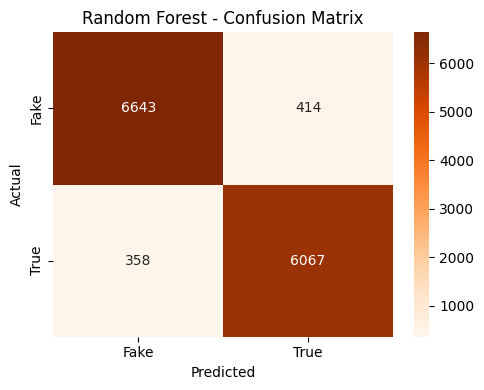

In [95]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.



*   True news commonly used factual, domain-specific nouns such as “government,” “official,” “report,” etc.


*   Fake news frequently repeated emotionally charged or conspiratorial terms like “trump,” “secret,” “order,” “Obama,” etc.
* True news articles were generally longer, more structured, and contained more named entities.

* Fake news had shorter,sentences with repetitive phrases.

